In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [3]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\소방청_세종시 재난별 건축물 데이터\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\소방청_세종시 재난별 건축물 데이터\\소방청_세종시 재난별 건축물 데이터_20210115.csv']

In [4]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,일련번호,긴급구조 우편번호,긴급구조 동명,긴급구조 리명,긴급구조 종별명,긴급구조 분류명,긴급구조 규모명,상황종료일시,상황종료일시(상세),관할서명,서센터명,주용도명,대상물구분명,구군명,동명,리명,우편번호,대상물기준명,산번지여부,도로명
0,1,71105,금남면,용포리,기타,기타출동,1차출동,2012-08-28,16:03:03,조치원소방서,조치원119구조대,업무시설,일반대상,세종특별자치시,금남면,용포리,0.0,일반대상물,NaN,용포로
1,2,71105,금남면,용포리,기타,기타출동,1차출동,2012-08-28,16:03:03,조치원소방서,조치원119구조대,업무시설,NaN,세종특별자치시,금남면,용포리,30083.0,자동화재탐지설치대상,NaN,용포로
2,3,71033,조치원읍,신안리,기타,지원출동(재해),1차출동,2012-08-28,19:16:05,조치원소방서,조치원119안전센터,근린생활,일반대상,세종특별자치시,조치원읍,신안리,339886.0,일반대상물,NaN,안터길
3,4,71151,조치원읍,원리,구급,질병,1차출동,2012-08-28,19:14:33,조치원소방서,조치원119안전센터,근린생활,일반대상,세종특별자치시,조치원읍,원리,339883.0,일반대상물,NaN,조치원로
4,5,71149,조치원읍,상리,구급,질병외,1차출동,2012-08-28,18:55:18,조치원소방서,조치원119안전센터,근린생활,일반대상,세종특별자치시,조치원읍,상리,339881.0,일반대상물,NaN,조치원10길


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44106 entries, 0 to 44105
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   일련번호        44106 non-null  int64  
 1   긴급구조 우편번호   43491 non-null  object 
 2   긴급구조 동명     44106 non-null  object 
 3   긴급구조 리명     32189 non-null  object 
 4   긴급구조 종별명    44070 non-null  object 
 5   긴급구조 분류명    44099 non-null  object 
 6   긴급구조 규모명    44099 non-null  object 
 7   상황종료일시      44060 non-null  object 
 8   상황종료일시(상세)  44060 non-null  object 
 9   관할서명        44082 non-null  object 
 10  서센터명        44082 non-null  object 
 11  주용도명        44000 non-null  object 
 12  대상물구분명      40565 non-null  object 
 13  구군명         44106 non-null  object 
 14  동명          44106 non-null  object 
 15  리명          32189 non-null  object 
 16  우편번호        44056 non-null  float64
 17  대상물기준명      42149 non-null  object 
 18  산번지여부       214 non-null    object 
 19  도로명         39991 non-nul

In [6]:
df.describe()

,일련번호,우편번호
count,44106.000000,44056.000000
mean,22053.500000,202051.645292
std,12732.449823,160443.755045
min,1.000000,0.000000
25%,11027.250000,30058.000000
50%,22053.500000,339752.000000
75%,33079.750000,339851.000000
max,44106.000000,363944.000000


In [7]:
df.describe(include=np.object)

,긴급구조 우편번호,긴급구조 동명,긴급구조 리명,긴급구조 종별명,긴급구조 분류명,긴급구조 규모명,상황종료일시,상황종료일시(상세),관할서명,서센터명,주용도명,대상물구분명,구군명,동명,리명,대상물기준명,산번지여부,도로명
count,43491,44106,32189,44070,44099,44099,44060,44060,44082,44082,44000,40565,44106,44106,32189,42149,214,39991
unique,286,24,120,5,61,2,3079,27679,3,11,30,4,1,24,120,16,1,688
top,100-000,조치원읍,원리,구급,질병,1차출동,2017-11-29,11:19:04,조치원소방서,조치원119안전센터,근린생활,2급대상,세종특별자치시,조치원읍,원리,일반대상물,산,충현로
freq,3654,18912,3367,26519,15284,44097,99,52,30051,19884,13864,19292,44106,18912,3367,18066,214,1657


In [8]:
df.isnull().sum()

일련번호              0
긴급구조 우편번호       615
긴급구조 동명           0
긴급구조 리명       11917
긴급구조 종별명         36
긴급구조 분류명          7
긴급구조 규모명          7
상황종료일시           46
상황종료일시(상세)       46
관할서명             24
서센터명             24
주용도명            106
대상물구분명         3541
구군명               0
동명                0
리명            11917
우편번호             50
대상물기준명         1957
산번지여부         43892
도로명            4115
dtype: int64

## 전처리

In [9]:
df.drop(['우편번호','긴급구조 리명','리명','구군명'],axis=1,inplace=True)

In [11]:
df['산번지여부'] = df['산번지여부'].fillna('평지')
df.fillna('None',inplace=True)

In [13]:
def to_year(x):
    if x=='None':
        return -1
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.year

def to_month(x):
    if x=='None':
        return -1
    dat = datetime.strptime(x,'%Y-%m-%d')
    return dat.month

df['연도'] = df['상황종료일시'].apply(to_year)
df['월'] = df['상황종료일시'].apply(to_month)

In [14]:
def to_hour(x):
    if x=='None':
        return -1
    return int(x.split(':')[0])
df['시간'] = df['상황종료일시(상세)'].apply(to_hour)

In [16]:
df.describe()

,일련번호,연도,월,시간
count,44106.000000,44106.000000,44106.000000,44106.000000
mean,22053.500000,2015.108194,6.823856,13.235592
std,12732.449823,65.179448,3.383203,6.265047
min,1.000000,-1.000000,-1.000000,-1.000000
25%,11027.250000,2016.000000,4.000000,9.000000
50%,22053.500000,2017.000000,7.000000,14.000000
75%,33079.750000,2019.000000,10.000000,18.000000
max,44106.000000,2021.000000,12.000000,23.000000


In [15]:
df.describe(include=np.object)

,긴급구조 우편번호,긴급구조 동명,긴급구조 종별명,긴급구조 분류명,긴급구조 규모명,상황종료일시,상황종료일시(상세),관할서명,서센터명,주용도명,대상물구분명,동명,대상물기준명,산번지여부,도로명
count,44106,44106,44106,44106,44106,44106,44106,44106,44106,44106,44106,44106,44106,44106,44106
unique,287,24,6,62,3,3080,27680,4,12,31,5,24,17,2,689
top,100-000,조치원읍,구급,질병,1차출동,2017-11-29,11:19:04,조치원소방서,조치원119안전센터,근린생활,2급대상,조치원읍,일반대상물,평지,None
freq,3654,18912,26519,15284,44097,99,52,30051,19884,13864,19292,18912,18066,43892,4115


## 시각화

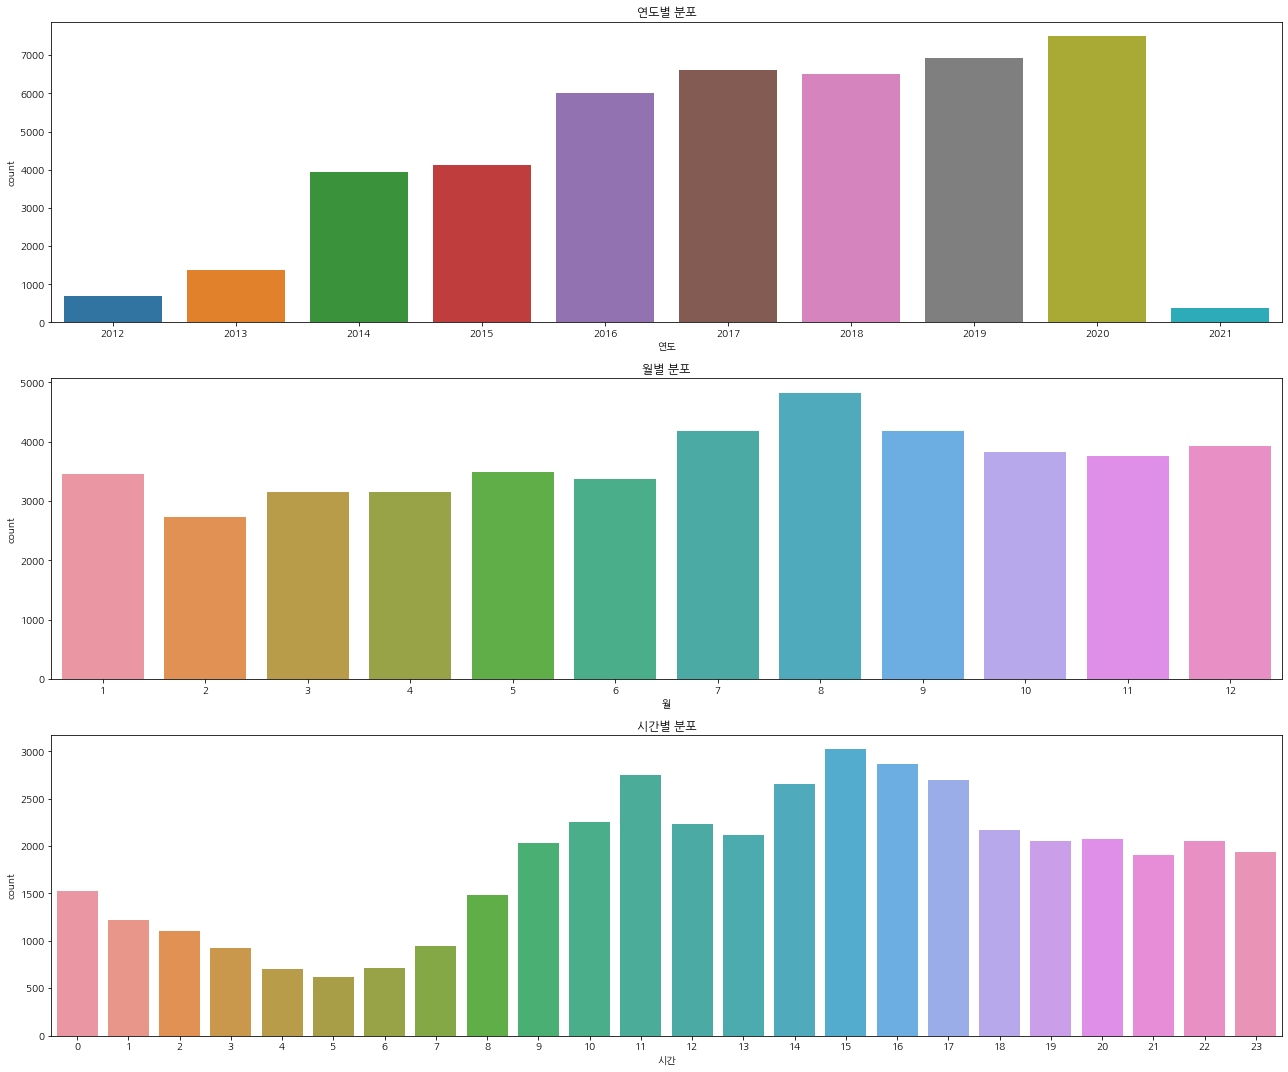

In [19]:
cols = ['연도','월','시간']
fig,axes = plt.subplots(3,1,figsize=(18,15))
for i,c in enumerate(cols):
    sub_df = df[df[c]!=-1].groupby(c,as_index=False)['일련번호'].count().sort_values(c,ascending=False)
    sns.barplot(data=sub_df,x=c,y='일련번호',ax=axes[i]).set(title=f'{c}별 분포',ylabel='count')
plt.tight_layout()

[Text(0.5, 1.0, '긴급구조 동명별 분포'), Text(0, 0.5, 'count')]

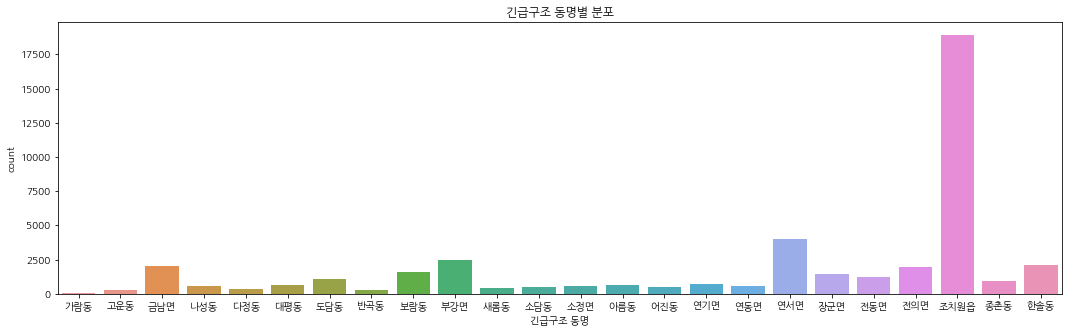

In [21]:
sub_df = df[df['긴급구조 동명']!='None'].groupby('긴급구조 동명',as_index=False)['일련번호'].count()
plt.figure(figsize=(18,5))
sns.barplot(data=sub_df,x='긴급구조 동명',y='일련번호').set(title='긴급구조 동명별 분포',ylabel='count')

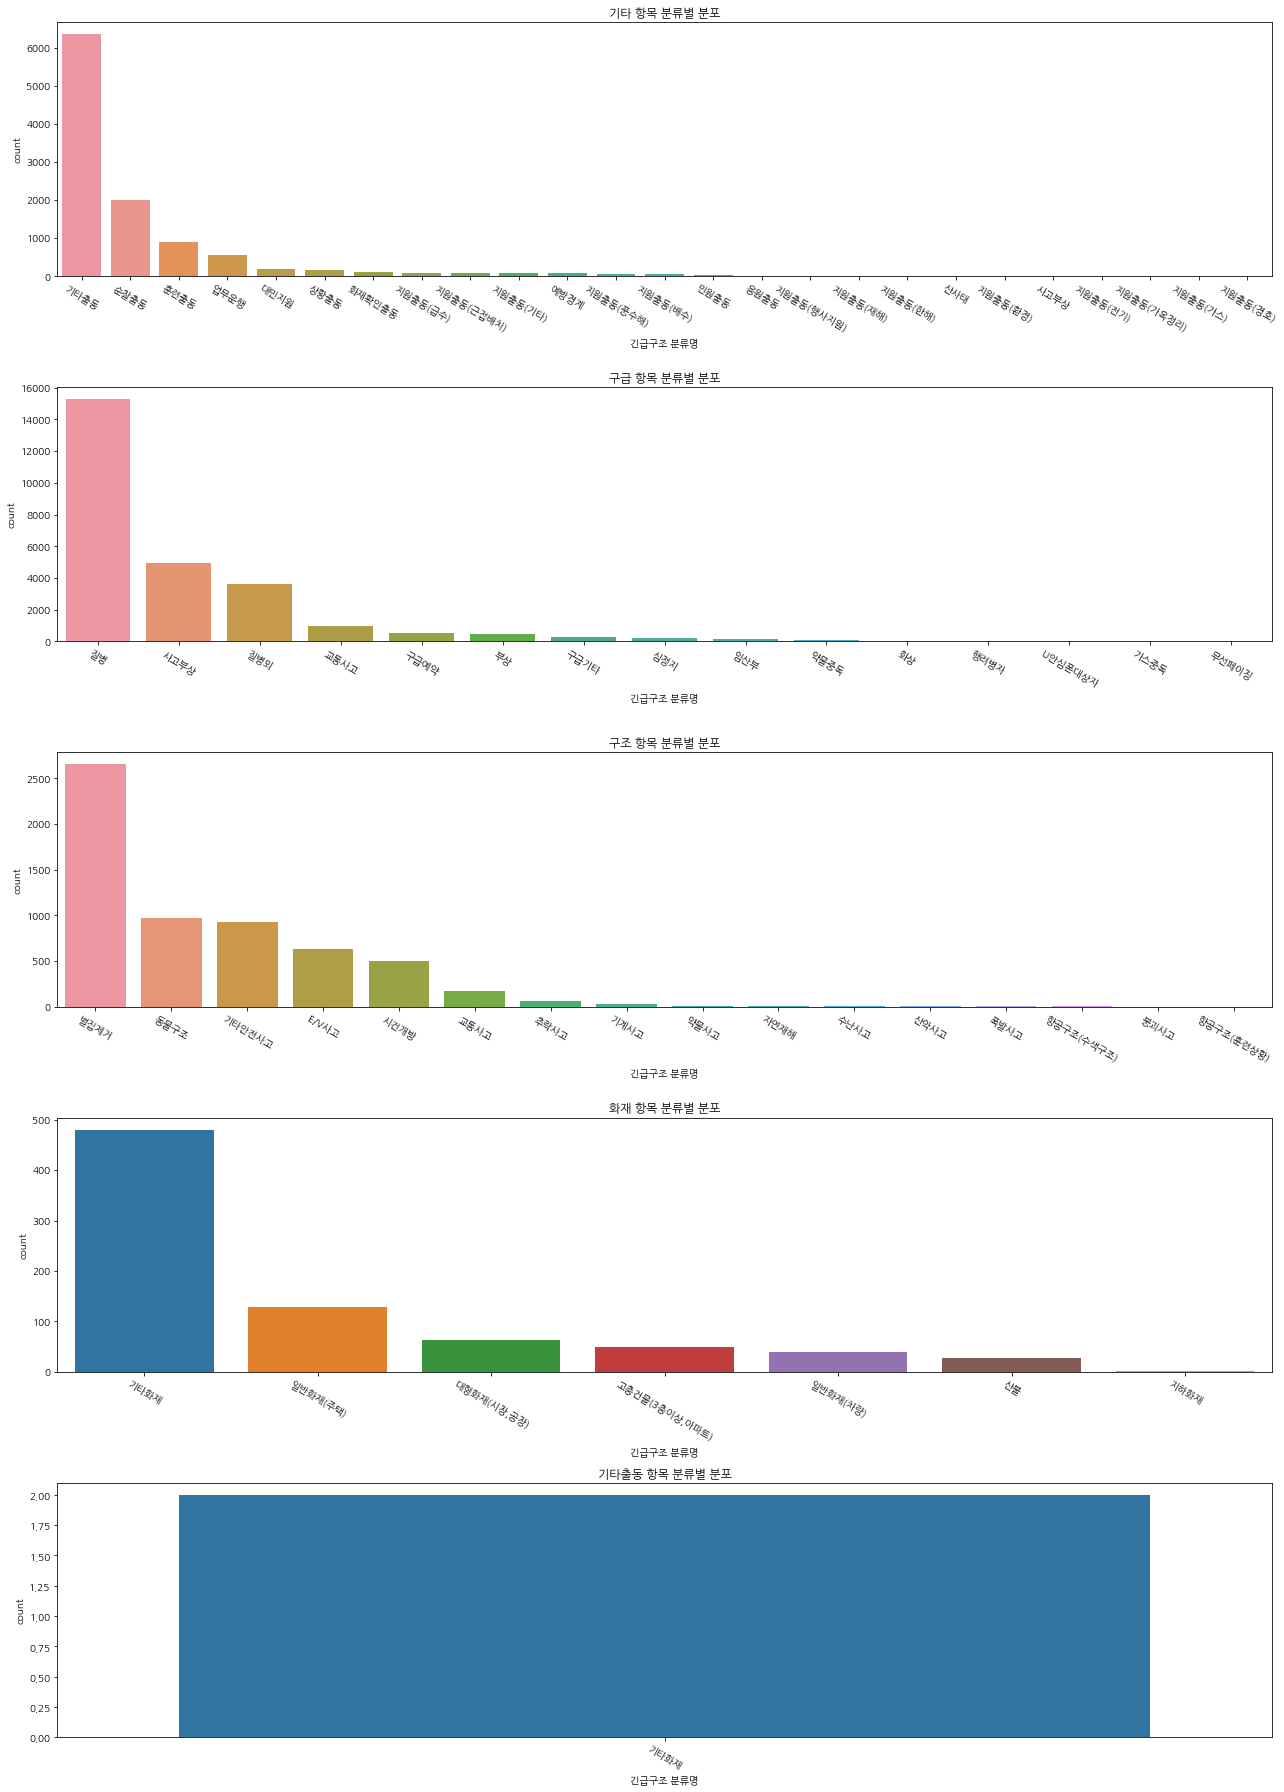

In [25]:
type_cols = df[df['긴급구조 종별명']!='None']['긴급구조 종별명'].unique()
fig,axes = plt.subplots(len(type_cols),1,figsize=(18,len(type_cols)*5))
for i,c in enumerate(type_cols):
    sub_df = df[df['긴급구조 종별명']==c].groupby('긴급구조 분류명',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
    sns.barplot(data=sub_df,x='긴급구조 분류명',y='일련번호',ax=axes[i]).set(title=f'{c} 항목 분류별 분포',ylabel='count')
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation=-30)
plt.tight_layout()

,긴급구조 규모명,일련번호
0,1차출동,44097
1,2차출동,2


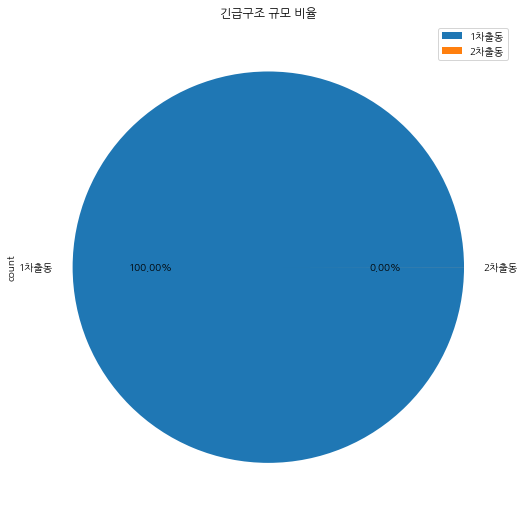

In [37]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df[df['긴급구조 규모명']!='None'].groupby('긴급구조 규모명',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sub_df.plot.pie(y='일련번호',labels=sub_df['긴급구조 규모명'].unique(),ylabel='count',autopct='%.2f%%',ax=ax,title='긴급구조 규모 비율')
sub_df

,산번지여부,일련번호
1,평지,43892
0,산,214


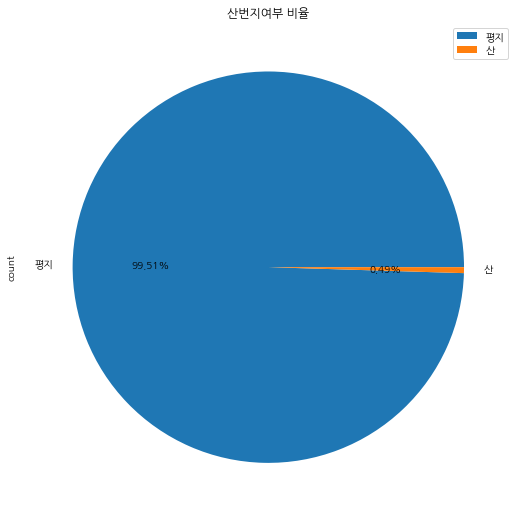

In [38]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df.groupby('산번지여부',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sub_df.plot.pie(y='일련번호',labels=sub_df['산번지여부'].unique(),ylabel='count',autopct='%.2f%%',ax=ax,title='산번지여부 비율')
sub_df

,대상물구분명,일련번호
1,2급대상,19292
3,일반대상,18239
0,1급대상,2977
2,기타-가설건축물,57


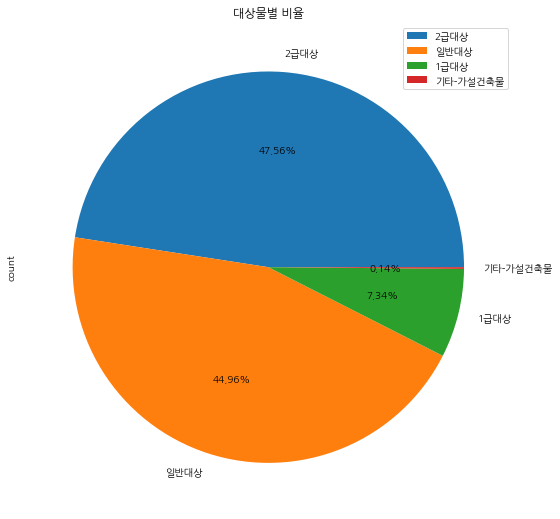

In [41]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df[df['대상물구분명']!='None'].groupby('대상물구분명',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sub_df.plot.pie(y='일련번호',labels=sub_df['대상물구분명'].unique(),ylabel='count',autopct='%.2f%%',ax=ax,title='대상물별 비율')
sub_df

,관할서명,일련번호
2,조치원소방서,30051
1,세종소방서,11592
0,세종소방본부,2439


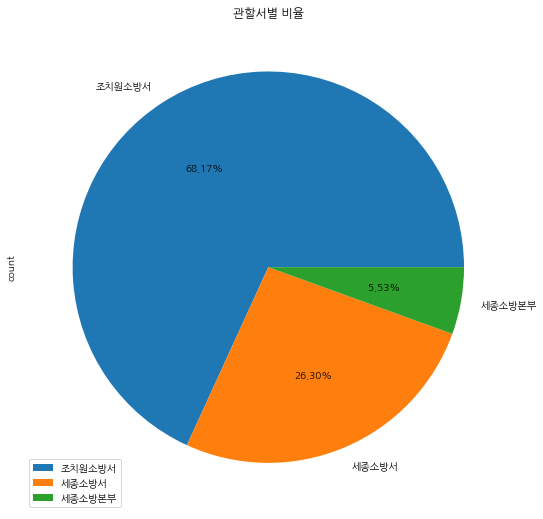

In [42]:
fig,ax = plt.subplots(1,1,figsize=(9,9))
sub_df = df[df['관할서명']!='None'].groupby('관할서명',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sub_df.plot.pie(y='일련번호',labels=sub_df['관할서명'].unique(),ylabel='count',autopct='%.2f%%',ax=ax,title='관할서별 비율')
sub_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, '근린생활'),
  Text(1, 0, '공동주택(아파트/기숙사)'),
  Text(2, 0, '복합건축물'),
  Text(3, 0, '업무시설'),
  Text(4, 0, '창고시설'),
  Text(5, 0, '공장'),
  Text(6, 0, '교육연구시설'),
  Text(7, 0, '판매시설및영업시설'),
  Text(8, 0, '노유자시설'),
  Text(9, 0, '동식물관련시설'),
  Text(10, 0, '문화집회및운동시설'),
  Text(11, 0, '숙박시설'),
  Text(12, 0, '운수자동차관련시설'),
  Text(13, 0, '위험물저장및처리시설'),
  Text(14, 0, '종교시설'),
  Text(15, 0, '의료시설'),
  Text(16, 0, '위생등관련시설'),
  Text(17, 0, '문화재'),
  Text(18, 0, '장례식장'),
  Text(19, 0, '항공기및자동차관련시설'),
  Text(20, 0, '교정시설'),
  Text(21, 0, '위락시설'),
  Text(22, 0, '발전시설'),
  Text(23, 0, '관광휴게시설'),
  Text(24, 0, '운동시설'),
  Text(25, 0, '통신촬영시설'),
  Text(26, 0, '지하가'),
  Text(27, 0, '지하구'),
  Text(28, 0, '수련시설'),
  Text(29, 0, '주택')])

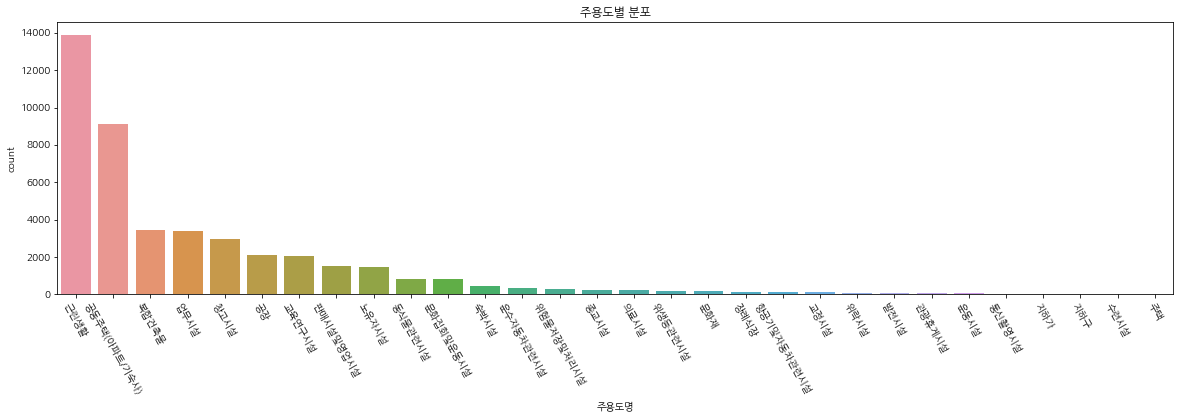

In [47]:
plt.figure(figsize=(20,5))
sub_df = df[df['주용도명']!='None'].groupby('주용도명',as_index=False)['일련번호'].count().sort_values('일련번호',ascending=False)
sns.barplot(data=sub_df,x='주용도명',y='일련번호').set(title='주용도별 분포',ylabel='count')
plt.xticks(rotation=-60)